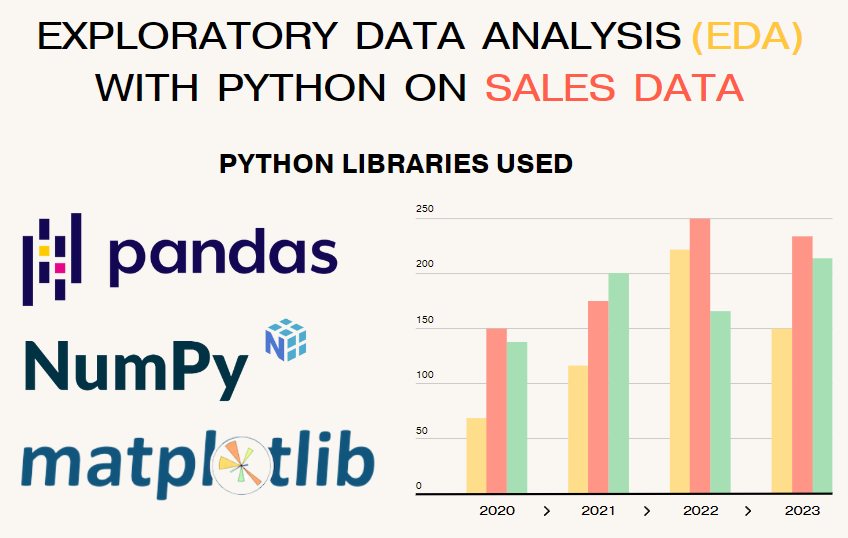

### Index:

1. <a href = '#1'> Importing The Libraries</a>
2. <a href = '#2'> Listing And Merging The Data Files</a>
3. <a href = '#3'> Reading In Updated DataFrame</a>
4. <a href = '#4'> Cleaning Up Data (Removing NaN Values)</a>
5. <a href = '#5'>Augment Data With Additional Columns (Month)</a>
6. <a href = '#6'>Removing String Values From (Month)</a>
7. <a href = '#7'>Type Casting Month to Int Data Type</a>
8. <a href = '#8'>Converting Other Columns Into Correct Data Type</a>
9. <a href = '#9'>Add Sales Column To DataFrame</a>
10. <a href = '#10'>Plotting a Bar Graph To Depict The Relationship Between Sales And Months.</a>
11. <a href = '#11'>Extracting City & State From Purchase Address And Creating a New Column of It.</a>
12. <a href = '#12'>Plotting a Bar Graph To Depict The Relationship Between Sales And Cities.</a>
13. <a href = '#13'>Order Date Column In DataFrame Is An Object Data Type, So We Need To Convert It Into DateTime.</a>
14. <a href = '#14'>Create a New Column Hour From Order Date.</a>
15. <a href = '#15'>Plotting a Plot Graph To Depict The Relationship Between Hours And Sales.</a>
16. <a href = '#16'>Checking Duplicates of Order ID In The Data.</a>
17. <a href = '#17'>Grouping/Joining Products Data Of The Same Order ID.</a>
18. <a href = '#18'>Importing The Necessary Libraries To Identify Products Frequently Purchased Together.</a>
19. <a href = '#19'>Grouping Products By The Quantity Ordered Using The Sum Aggregate Function.</a>
20. <a href = '#20'>Grouping Products By The Price Each Using The Mean Aggregate Function.</a>
21. <a href = '#21'> Creating a Subplot To Visualize The Relationship Between Products And The Quantity Ordered As a Bar Graph, And Product And Price As a Line Graph</a>

<a id='1'></a>

#### Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import os 

<a id='2'></a>

#### Merge The 12 Months of Sales Data Into a Single CSV File

In [2]:
lst = [x for x in os.listdir("./Sales_Data/")]
for i in lst:
    print(i)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
o_df = pd.DataFrame()
for files in lst:
    c_df = pd.read_csv(f'./Sales_Data/{files}')
    o_df = pd.concat([o_df, c_df])
o_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
o_df.to_csv('All_Months_Data', index=False)

<a id='3'></a>

#### Reading In Updated DataFrame

In [5]:
df = pd.read_csv('All_Months_Data')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.shape

(186850, 6)

<a id='4'></a>

#### Cleaning Up Data - Drop Rows of NaN

In [7]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
df[df.isna().any(axis=1)].size

0

<a id='5'></a>

# Q1.What was the best month for sales? How much was earned that month?

#### Augment Data With Additional Columns -  Adding Month Column

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
df['Month'] = df['Order Date'].str[0:2]

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


##### df['Month'] = pd.to_numeric(df.Month)
##### By running Above statememnt we get below error
##### ValueError: Unable to parse string "Or" at position 517

<a id='6'></a>

#### Finding And removing String ('Or') From Month Column

In [13]:
df.Month[df.Month.str.isdigit() == False].unique()

array(['Or'], dtype=object)

In [14]:
df[df.Month == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [15]:
index_all = df[df.Month== 'Or'].index

In [16]:
df.drop(index= index_all, inplace=True)

#### So From Below Output We Can See That There are no strings

In [17]:
df.Month[df.Month.str.isdigit() == False].unique()

array([], dtype=object)

<a id='7'></a>

#### Converting Month Column Data Type To Int Data Type

In [18]:
# df['Month'] = df['Month'].astype('int64')
df['Month']= pd.to_numeric(df.Month)

In [19]:
np.sort(df.Month.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [20]:
df.groupby('Month')['Order ID'].count().sort_values(ascending = True)

Month
1      9709
9     11621
8     11961
2     11975
6     13554
7     14293
3     15153
5     16566
11    17573
4     18279
10    20282
12    24984
Name: Order ID, dtype: int64

<a id='8'></a>

#### Converting Other Columns into Correct Data Type

In [21]:
# df['Quantity Ordered'] = df['Quantity Ordered'].astypeype('int')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [22]:
df['Price Each'] = pd.to_numeric(df['Price Each'])

<a id='9'></a>

#### Add sales column to dataframe

In [23]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [24]:
df.Sales

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Sales, Length: 185950, dtype: float64

In [25]:
sales = df.groupby('Month')['Sales'].sum()
sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

<a id='10'></a>

#### Plotting a Bar Graph To Depict The Relationship Between Sales And Months.

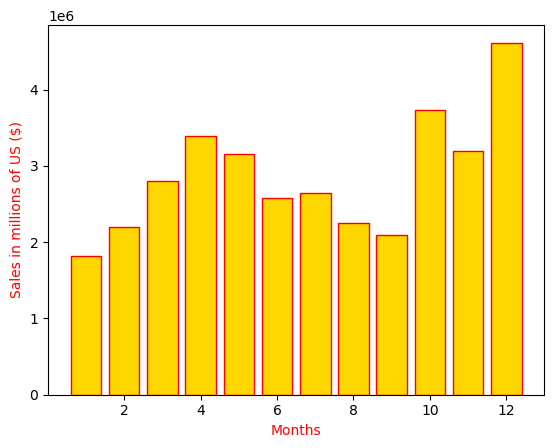

In [26]:
import matplotlib.pyplot as plt
# months = range(1,13)
# plt.bar(months, q)
plt.bar(sales.index, sales, color = 'gold', edgecolor = 'red')
plt.xlabel('Months', color = 'red')
plt.ylabel("Sales in millions of US ($)", color = 'red')
plt.show()

####  

# Q2. Which City Has The Highest Number of Sales

<a id='11'></a>

#### Extracting City & State From Purchase Address And Creating a New Column of It

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [28]:
def get_city(add):
    return add.split(',')[1]
def get_state(add):
    return add.split(',')[2].split(' ')[1]

In [29]:
df['City_State'] = list(map(lambda x : f"{get_city(x)} ({get_state(x)})", df['Purchase Address']))

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [31]:
CS_sales = df.groupby('City_State')['Sales'].sum()

In [32]:
CS_sales

City_State
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Sales, dtype: float64

<a id='12'></a>

#### Plotting a Bar Graph To Depict The Relationship Between Sales And Cities 

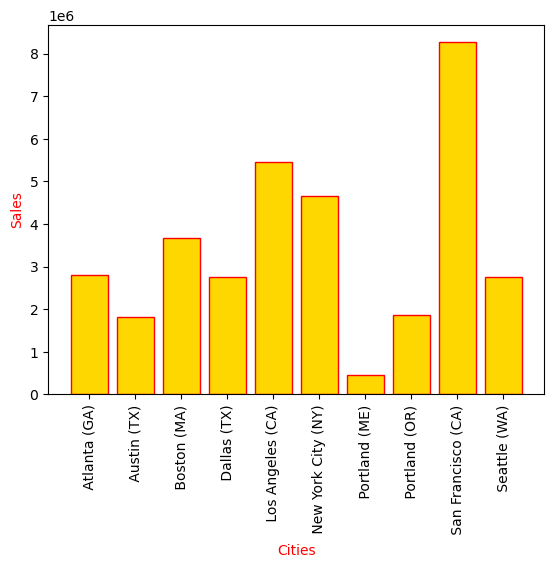

In [33]:
plt.bar(CS_sales.index, CS_sales,  color = 'gold', edgecolor = 'red')
plt.xticks(rotation='vertical')
plt.xlabel('Cities',  color = 'red')
plt.ylabel('Sales',  color = 'red')
plt.show()

## 3. what time should be display advertising to maximize  likelihood of cusotmer's buying projuct?

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


<a id='13'></a>

#### Order Date Column In DataFrame Is An Object Data Type, So We Need To Convert It Into DateTime

In [35]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [36]:
df['Order Date']

0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

<a id='14'></a>

#### Create a New Hour Column From Order Date

In [37]:
df['Hour'] = df['Order Date'].dt.hour

In [38]:
Hour_Sales = df.groupby('Hour')['Sales'].sum()
Hour_Sales.head()

Hour
0    713721.27
1    460866.88
2    234851.44
3    145757.89
4    162661.01
Name: Sales, dtype: float64

In [39]:
Hour_Sales.shape

(24,)

<a id='15'></a>

#### Plotting a Plot Graph To Depict The Relationship Between Hours And Sales.

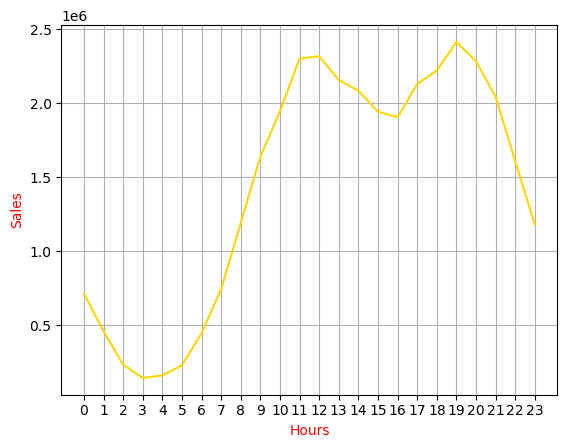

In [40]:
Hours = Hour_Sales.index
Sales = Hour_Sales
plt.plot(Hours, Sales, color = 'gold')
plt.xticks(Hours)
plt.xlabel('Hours',  color = 'red')
plt.ylabel('Sales',  color = 'red')
plt.grid()
plt.show()

## 4. What products are most often sold together

In [41]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


<a id='16'></a>

#### Checking Duplicates of Order ID In The Data.

In [42]:
df[df['Order ID'].duplicated()].shape

(7513, 10)

In [43]:
df.shape

(185950, 10)

In [44]:
df[df['Order ID'].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13


In [45]:
df[df['Order ID'].duplicated(keep=False)].shape

(14649, 10)

In [46]:
dup_df = df[df['Order ID'].duplicated(keep=False)]

In [47]:
dup_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11


<a id='17'></a>

#### Grouping/joining products data of the same order ID

In [48]:
dup_df['Grouped'] = dup_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\96655\AppData\Local\Temp\ipykernel_7664\2380154571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_df['Grouped'] = dup_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [49]:
dup_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [50]:
dup_df = dup_df[['Order ID', 'Grouped']].drop_duplicates()

In [51]:
dup_df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


<a id='18'></a>

#### Importing The Necessary Libraries To Identify Products Frequently Purchased Together.

In [52]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup_df['Grouped']:
    row_list = row.split(',')
    count.update(combinations(row_list, 2))    

In [53]:
for k, v in count.most_common(10):
    print(k,v)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


According to the data, Google Phones and USB-C charging cables are the next most popular pairing, followed by iPhones and Lightning charging cables. This indicates a possibility for cross-selling, where customers buying mobile phones could be encouraged to buy suitable charging cables.

## 5. What products sold the most? why do you think it sold the most?

In [54]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


<a id='19'></a>

#### Grouping Products By The Quantity Ordered Using The Sum Aggregate Function.

In [55]:
pro_Q = df.groupby('Product')['Quantity Ordered'].sum()

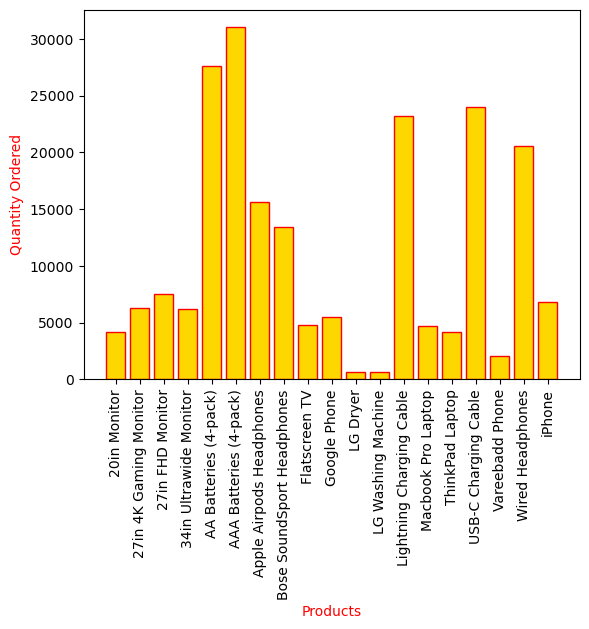

In [56]:
plt.bar(pro_Q.index, pro_Q, color = 'gold', edgecolor = 'red')
plt.xticks(rotation='vertical')
plt.xlabel('Products',  color = 'red')
plt.ylabel('Quantity Ordered',  color = 'red')
plt.show()

<a id='20'></a>

#### Grouping Products By The Price Each Using The Mean Aggregate Function.

In [57]:
pro_P = df.groupby('Product')['Price Each'].mean()

In [58]:
pro_P

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<a id='21'></a>

#### Creating a Subplot To Visualize The Relationship Between Products And The Quantity Ordered As a Bar Graph, And Product And Price As a Line Graph

C:\Users\96655\AppData\Local\Temp\ipykernel_7664\3053424605.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pro_P.index,rotation='vertical', size =10)


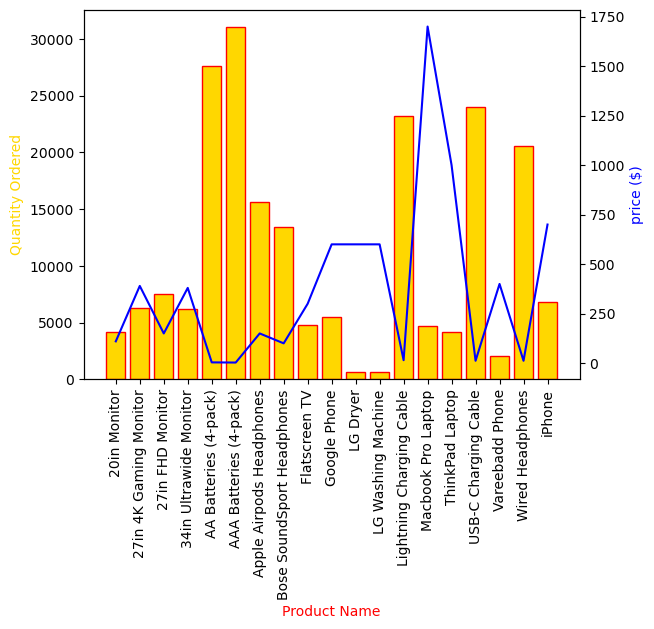

In [59]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(pro_Q.index, pro_Q, color = 'gold', edgecolor = 'red')
ax2.plot(pro_P.index, pro_P, color='blue')

ax1.set_xlabel('Product Name', color = 'red')
ax1.set_ylabel('Quantity Ordered', color='gold')
ax2.set_ylabel('price ($)', color = 'blue')
ax1.set_xticklabels(pro_P.index,rotation='vertical', size =10)
plt.show()